# Линейная регрессия по временным рядам

TODO:
* временное осреднение
* пространственное осреднение
* регрессия по предыдущим значениям
* авторегрессия по прошлым значениям
* регрессия по полям
* посмотреть ограничение на мнк меньше единицы

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import seaborn as sns

import netCDF4 as nc

from tools import MyNetCDF, Preprocessing
from models import Fitter
import netCDF4 as nc

## 1. Fitting model variables to model ice prediction
Here we will try to predict ice concentration based on model variables

In [2]:
# loading data
process = Preprocessing()
ds_train = process.load_csv(filepath = 'data/model/data_daily-16.csv', continuous_check=True)
ds_test = process.load_csv(filepath = 'data/model/data_daily-17.csv', continuous_check=True)

#defining target and features
target_var = 'iceconc'
ice_var_list = ['ice_volume', 'iceconc', 'icethic_cea', 'siconcat','sithicat', 'snowthic_cea']
model_var_list = ['sossheig','votemper','vosaline']

Found 0 gaps
Found 2 gaps


### 1.1 Model ice variables to model ice
- **X train**: model ice variables 2016
- **X test** : model ice variables 2017
- **y train**: model ice concentration 2016
- **y test** : model ice concentration 2017

/Users/drigo/anaconda3/envs/disser/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


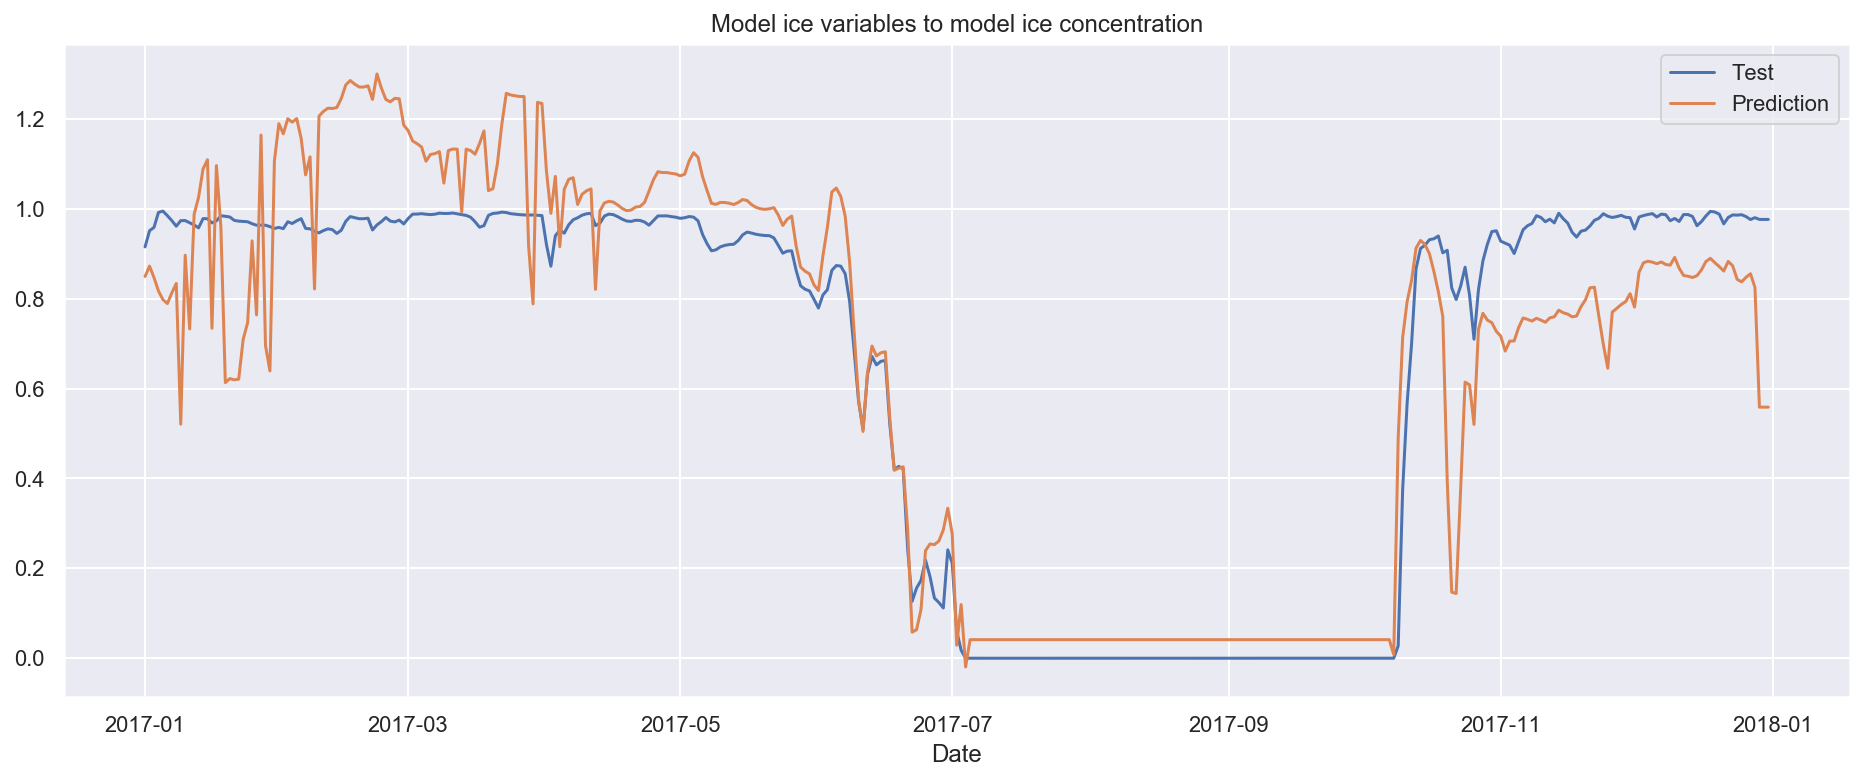

In [3]:
# initialize the regression instance
fitter_model = Fitter(train=ds_train, test = ds_test)

# fit on ice variables
fitter_model.define_target(target_var, ice_var_list)
fitter_model.linear_regression_prediction()
fitter_model.lineplot('Model ice variables to model ice concentration')

### 1.2 Model variables to model ice
- **X train**: model variables 2016
- **X test** : model variables 2017
- **y train**: model ice concentration 2016
- **y test** : model ice concentration 2017

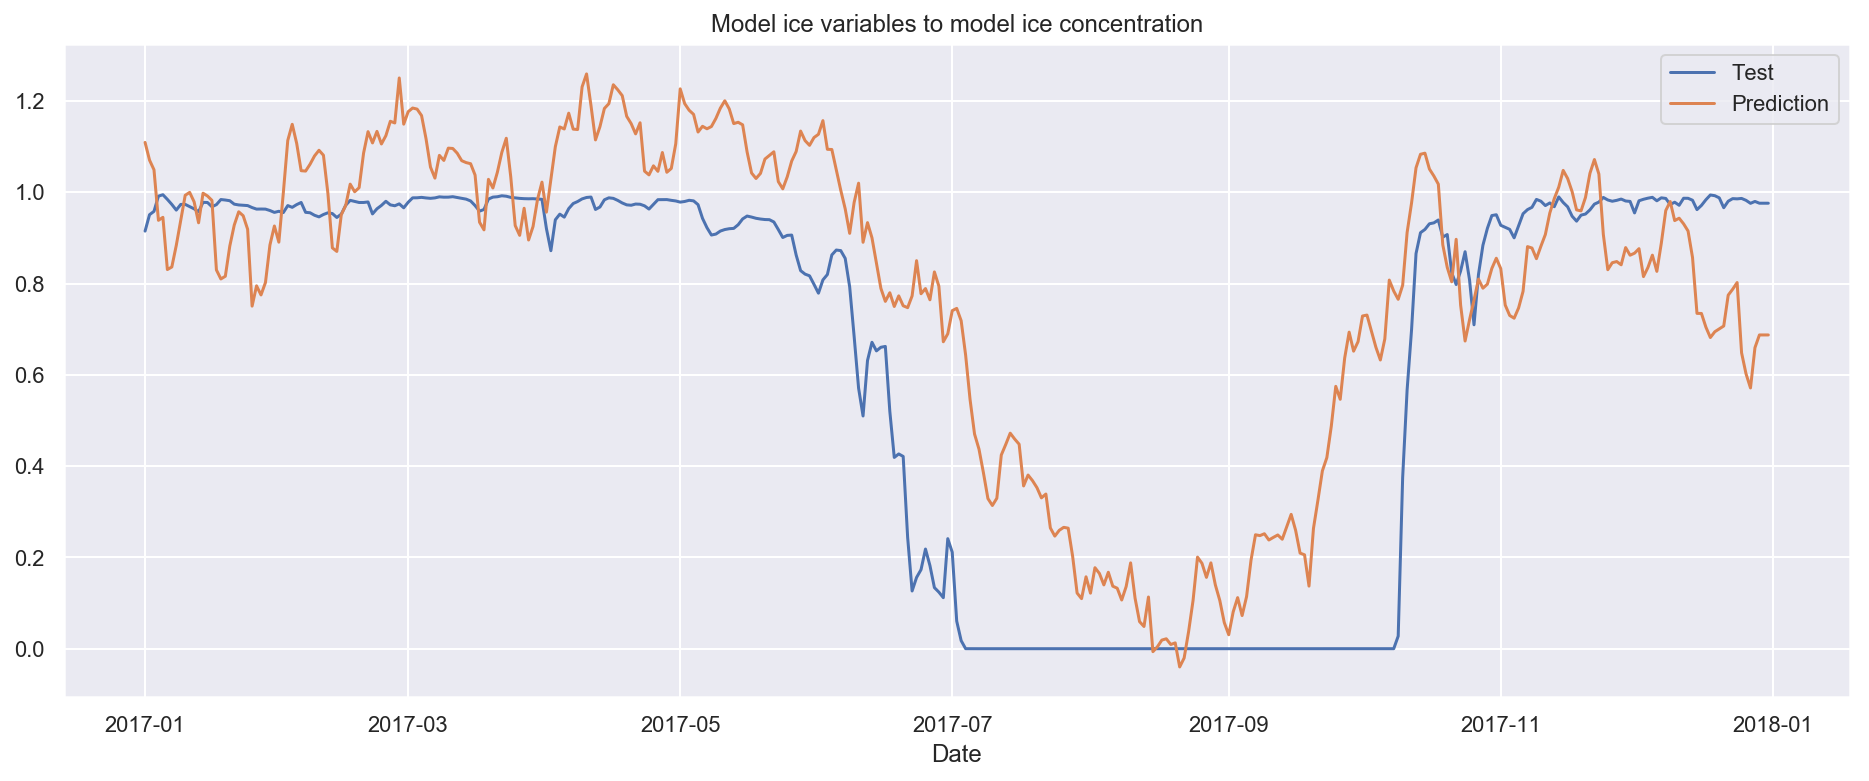

In [4]:
# fit on other model variables
fitter_model.define_target(target_var, model_var_list)
fitter_model.linear_regression_prediction()
fitter_model.lineplot('Model ice variables to model ice concentration')

## 2. Fitting model ice variables to sattelite ice
Here we will try to predict ice concentration by sattelite based on model variables

In [5]:
#preparing target data from sattelite
myNC2016 = MyNetCDF(nc.Dataset('data/sattelite/conc_y2016.nc'))
data2016 = myNC2016.get_timeseries(80,90, ['ice_conc'])

myNC2017 = MyNetCDF(nc.Dataset('data/sattelite/conc_y2017.nc'))
data2017 = myNC2017.get_timeseries(80,90, ['ice_conc'])

pr2016 = Preprocessing(data2016)
pr2016.continuous_check()

pr2017 = Preprocessing(data2017)
pr2017.continuous_check()

y_train = pr2016.df
y_test = pr2017.df

Found 0 gaps
Found 0 gaps


### 2.1 Model ice variables to sattelite ice concentration
- **X train**: model ice variables 2016
- **X test** : model ice variables 2017
- **y train**: sattelite ice concentration 2016
- **y test** : sattelite ice concentration 2017

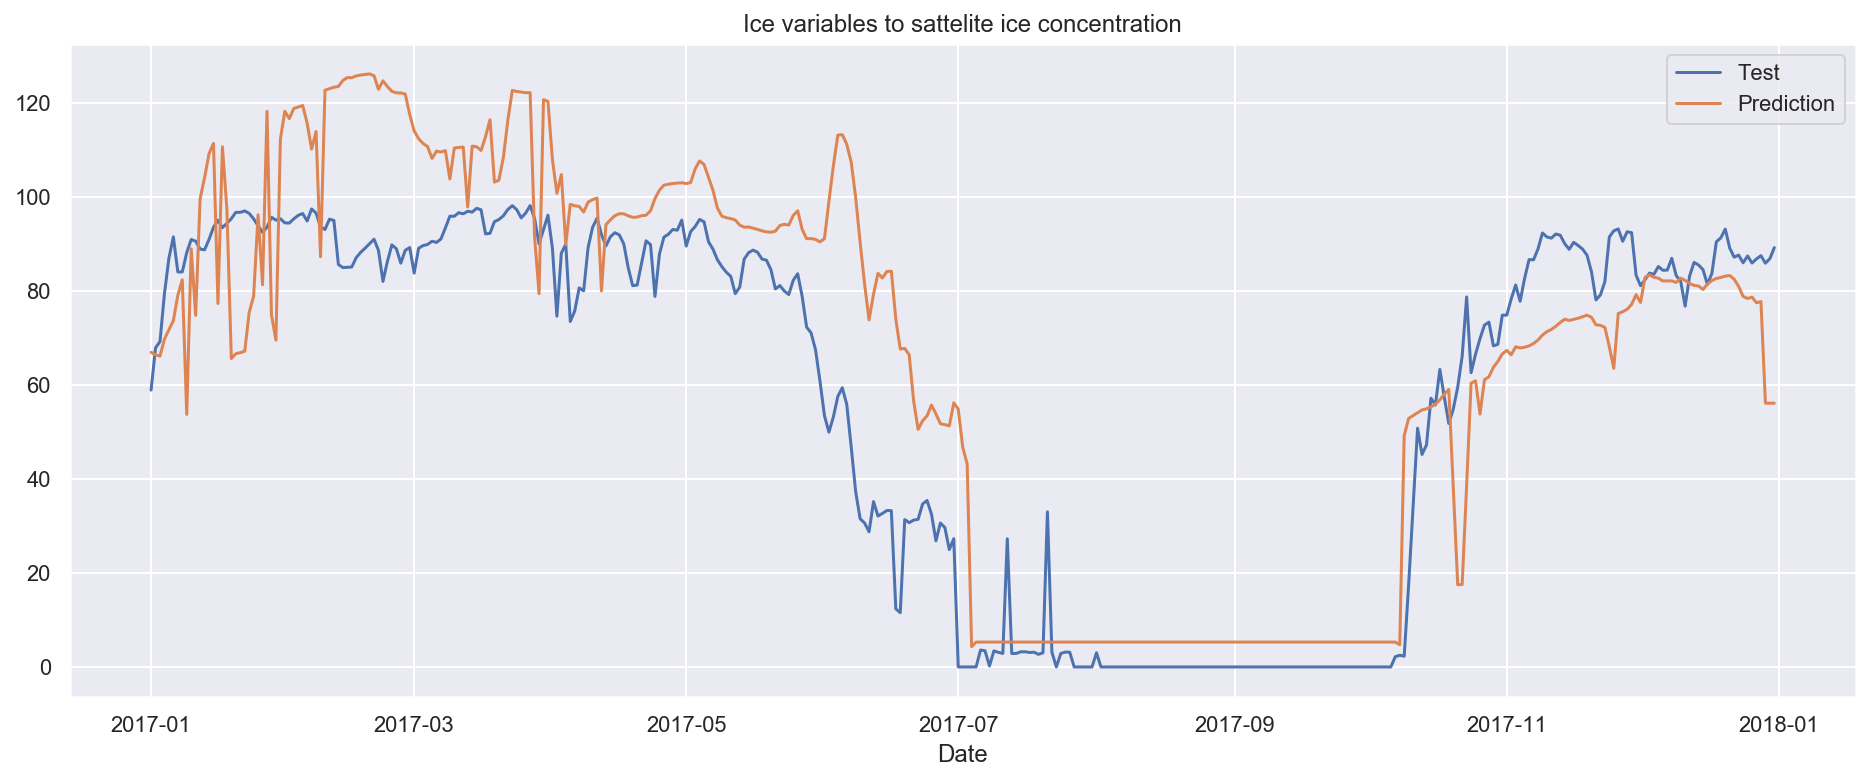

In [6]:
# initialize the regression instance
fitter_model = Fitter(train=ds_train, test = ds_test,
                     y_test=y_test, y_train=y_train)

fitter_model.define_target(target_var, ice_var_list)
fitter_model.linear_regression_prediction()
fitter_model.lineplot('Ice variables to sattelite ice concentration')

### 2.2 Model variables to sattelite ice concentration
- **X train**: model variables 2016
- **X test** : model variables 2017
- **y train**: sattelite ice concentration 2016
- **y test** : sattelite ice concentration 2017

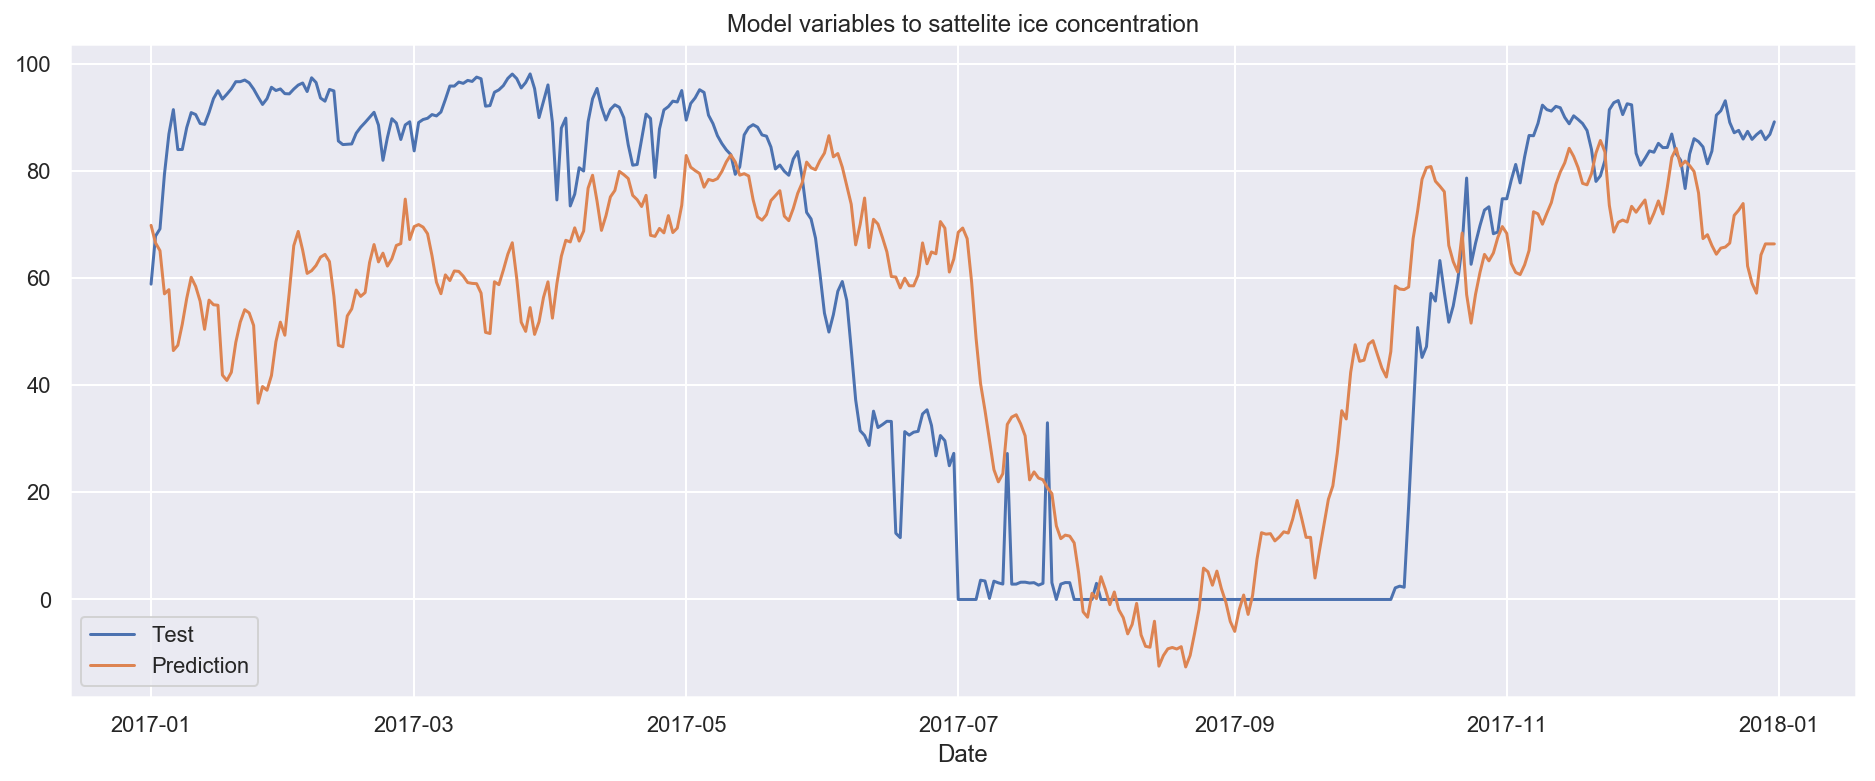

In [7]:
# initialize the regression instance
fitter_model = Fitter(train=ds_train, test = ds_test,
                     y_test=y_test, y_train=y_train)

fitter_model.define_target(target_var, model_var_list)
fitter_model.linear_regression_prediction()
fitter_model.lineplot('Model variables to sattelite ice concentration')